In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# matplotlib 한글처리
matplotlib에 설정되있는 폰트가 한글을 지원하지 않기 때문에 그래프의 한글이 깨져서 나온다.

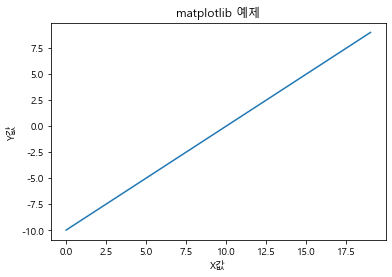

In [1]:
import matplotlib.pyplot as plt
plt.plot(range(-10,10))
plt.xlabel("X값")
plt.ylabel("Y값")
plt.title('matplotlib 예제')
plt.show()
#한글이 깨지는 예시이다.
#만약 경고문이 뜬다면, 그것은 '한글이 깨지고 있어요'라는 문구이다.

## 설정방법
1. 설정파일을 변경한다. (코드와 관계없이 존재하는 설정 파일이 있다.)
    - 한번만 하면 된다.
2. 프로그램상에서 변경한다.
    - 프로그램이 로딩 될때마다 (노트북 파일이나 파이썬 스크립트 실행시마다) 코드를 실행해야 한다.
    - 전체 설정에서 변경하고 싶은 것을 재설정한다.

## OS에 설치된 폰트명 조회

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

폰트 cache 파일을 삭제 한다.

In [3]:
# cache 파일 조회
# 다음 실행 결과로 나온 디렉토리 안의 파일을 삭제한다. 
#출력 결과로 나오는 파일의 경로로 가서, json 파일을 삭제하면 된다.
print(mpl.get_cachedir())

C:\Users\User\.matplotlib


전체 폰트 조회

In [4]:
for f in fm.fontManager.ttflist:
    print(f.name, f.fname,sep='-----')  # 폰트이름, 폰트파일경로
    #뭔가가 많다! 그만큼 폰트가 많다는 의미이다.

STIXSizeOneSym-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizOneSymBol.ttf
STIXNonUnicode-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUni.ttf
cmtt10-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmtt10.ttf
STIXSizeFourSym-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizFourSymBol.ttf
DejaVu Serif-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-BoldItalic.ttf
STIXNonUnicode-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniBolIta.ttf
STIXSizeThreeSym-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizThreeSymBol.ttf
cmss10-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmss10.ttf
DejaVu Serif-----C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Italic.ttf
cmb10-----C:\Users\User\

원하는 폰트명 찾기

In [5]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'malg' in f.name.lower()]  
#mac : AppleGothic
# 설정시 폰트 이름을 사용
#맑은 고딕을 찾는 구문! 이처럼 하면 다른 폰트도 찾을 수 있겠지??

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf')]

## 폰트등 환경 설정하기 
###  설정파일 변경
- 한번만 하면 되므로 편리하다.

설정파일 경로찾기: `matplotlib.matplotlib_fname()`
matplotlib 관련 전역 설정들을 찾아 바꿔준다.
- 폰트 관련 설정
```
font.family:Malgun Gothic
font.size:20
axes.titlesize:30
axes.labelsize:20  
axes.unicode_minus:False
xtick.labelsize:15
ytick.labelsize:15 
```

In [6]:
print(mpl.matplotlib_fname())
#경로가 뜬다. 이 경로는 matplotlib의 설정과 관련된 파일이다.
#경로를 검색하고, 메모장을 통해 정보를 본다. 뭐 다른 앱으로 봐도 되고!
#파일 열면 뭔가가 많이 나올 텐데...... ㅋㅋㅋㅋ 뭐 그때 알아도 되는 정보이긴 하다.
#우리는 font-family를 맑은 고딕으로 바꾸었다.

#그런 다음, axes.unicode_minus를 false로 바꾸었다. 이렇게 하면 한글설정 끝!!



C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### 함수를 이용해 설정
- `matplotlib.rcParam['설정'] = 값` 으로 변경
- rcParam은 꽤 중요한 함수이므로, 예시를 잘 봐두자. 이 함수를 이용하면 귀찮게 설정 파일까지 들어갈 필요가 없다.

In [13]:
import matplotlib as mpl
from matplotlib import font_manager as fm

# 한글 폰트 설정
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 폰트변경
mpl.rcParams["font.family"] = "malgun gothic"
# 폰트 size변경
mpl.rcParams["font.size"] = 20
# x, y 축의 label 크기 변경
mpl.rcParams['axes.labelsize'] = 15
# x, y 축의 tick(눈금) label 크기 변경
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# tick의 음수기호 '-' 가 깨지는 것 처리 (false로 하는 것이 맞다.)
mpl.rcParams['axes.unicode_minus'] = False

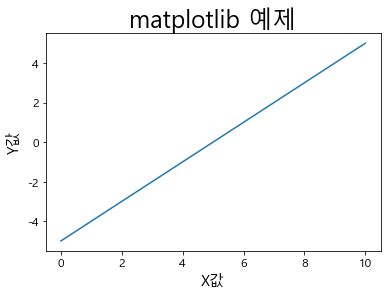

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(-5,6))
plt.xlabel("X값")
plt.ylabel("Y값")
plt.title('matplotlib 예제')
plt.show()